In [102]:
import pandas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,precision_score, f1_score, accuracy_score, recall_score
import matplotlib.pyplot as plt

In [66]:
water = pandas.read_csv("water-potability.csv")
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [67]:
water = water.dropna()
water.shape

(2011, 10)

In [68]:
X = water.drop(columns=["Potability"])
y = water["Potability"]

Rozdělení dat na trénovací a testovací:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Z-score:

In [70]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Trénování modelu:

In [71]:
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

Aplikace modelu na testovací data:

In [72]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

Vyhodnocení úspěšnosti modelu (ConfusionMatrixDisplay)

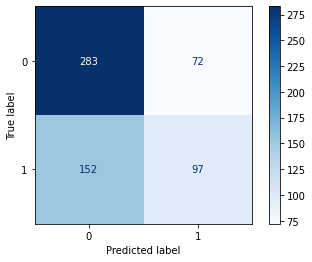

In [73]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues,
)

Vyhodnocení úspěšnosti modelu (Presicion score - čím vyšší číslo, tím přesnější)

In [74]:
precision_score(y_test, y_pred)

0.5739644970414202

Vyhodnocení úspěšnosti modelu (f1_score)

In [75]:
f1_score(y_test,y_pred)

0.4641148325358852

Výběr nejlepšího parametru pro nejlepší výsledek precision_score:

[0.48868778280542985, 0.5336538461538461, 0.5739644970414202, 0.5549132947976878, 0.5617283950617284, 0.589041095890411, 0.6086956521739131, 0.6299212598425197, 0.5692307692307692, 0.5892857142857143, 0.6, 0.6272727272727273, 0.6435643564356436, 0.6781609195402298, 0.6818181818181818, 0.7037037037037037, 0.7105263157894737, 0.7083333333333334, 0.7083333333333334, 0.6923076923076923]


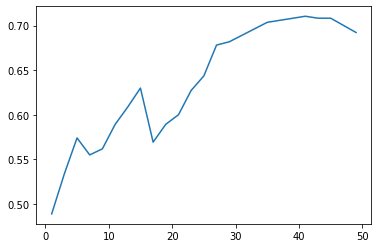

In [95]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 35, 41, 43, 45, 49]
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    precision_scores.append(precision_score(y_test,y_pred))

print(precision_scores)
    
plt.plot(ks,precision_scores)
   

In [99]:
clf=KNeighborsClassifier(n_neighbors=43)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
precision_score(y_test, y_pred)


0.7083333333333334

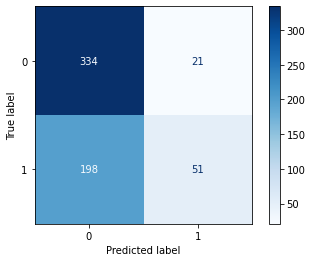

In [100]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues,
)

In [101]:
print(f"Manuální výpočet: 51(TP)/51(TP)+21(FP) = {51/(51+21)}")

manuální výpočet: 51(TP)/51(TP)+21(FP) = 0.7083333333333334


Dobrovolný doplněk:

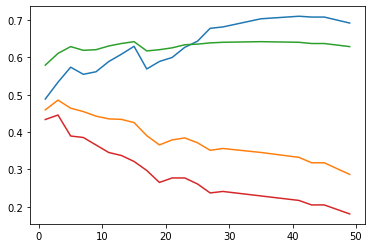

In [122]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 35, 41, 43, 45, 49]
precision_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []


for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    precision_scores.append(precision_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred))
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred))
    
df_scores = pandas.DataFrame(columns=["k"])
df_scores["k"] = ks
df_scores["precision_score"]=precision_scores
df_scores["f1_score"]=f1_scores
df_scores["accuracy_score"] = accuracy_scores
df_scores["recall_score"]=recall_scores
df_scores = df_scores.set_index("k")

plt.plot(df_scores)


    